In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler

from LRs import Linear_Regression_From_Scratch, Linear_Regression_Sklearn, Linear_Regression_Tensorflow

In [2]:
housing = fetch_california_housing()
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df.head(5)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [3]:
y = housing.target
y

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

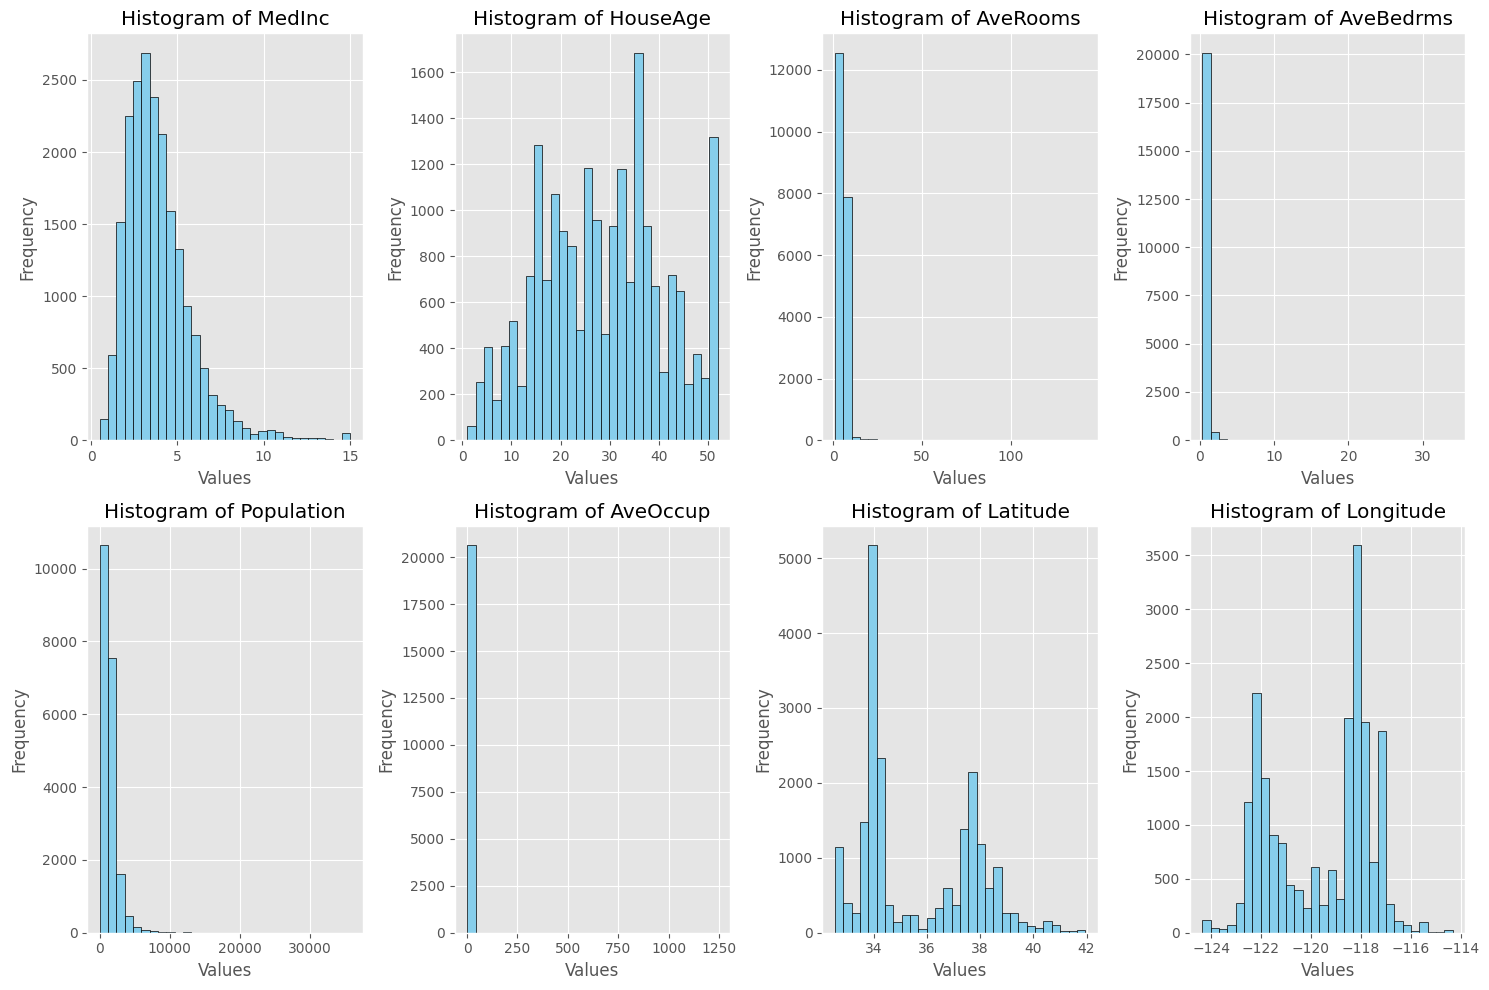

In [4]:
def histogram(data, bins = 30):
    plt.hist(data, bins=bins, color='skyblue', edgecolor='black')
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.title('Basic Histogram')
    
    # Display the plot
    plt.show()

img_per_row = 4
num_cols = len(df.columns)
num_rows = (num_cols + img_per_row - 1) // img_per_row
fig, axes = plt.subplots(num_rows, img_per_row, figsize=(15, 5 * num_rows))
axes = axes.flatten()
for idx, col in enumerate(df.columns):
    axes[idx].hist(df[col], bins=30, color='skyblue', edgecolor='black')
    axes[idx].set_title(f"Histogram of {col}")
    axes[idx].set_xlabel('Values')
    axes[idx].set_ylabel('Frequency')

for idx in range(num_cols, len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()

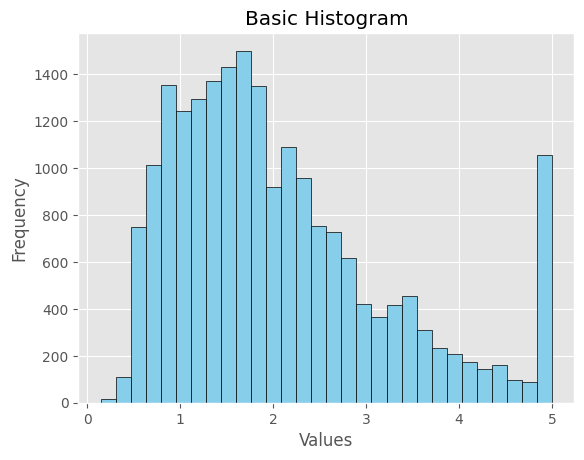

In [5]:
histogram(y)

In [6]:
for col in df.columns:
    sc = StandardScaler()
    df[col] = sc.fit_transform(df[[col]].to_numpy().reshape(-1, 1))

sc = StandardScaler()
y = sc.fit_transform(y.reshape(-1, 1))

In [9]:
X = df.to_numpy()
y = y

input_shape = X[0].shape
output_shape = 1

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9 (36.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.9838 - mse: 0.9838 - val_loss: 1.2418 - val_mse: 1.2418
Epoch 2/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 924us/step - loss: 0.4974 - mse: 0.4974 - val_loss: 0.8921 - val_mse: 0.8921
Epoch 3/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4295 - mse: 0.4295 - val_loss: 0.7053 - val_mse: 0.7053
Epoch 4/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4302 - mse: 0.4302 - val_loss: 0.5959 - val_mse: 0.5959
Epoch 5/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4042 - mse: 0.4042 - val_loss: 0.5243 - val_mse: 0.5243
Epoch 6/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 940us/step - loss: 0.4161 - mse: 0.4161 - val_loss: 0.4805 - val_mse: 0.4805
Epoch 7/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 927us/step - loss: 0.4181 - mse: 0.4181 - val_loss: 0.4506 - val_mse: 0.4506
Epoch 8/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 913us/step - loss: 0.4046 - mse: 0.4046 - val_loss: 0.4306 - val_mse: 0.4306
Epoch 9/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1000u

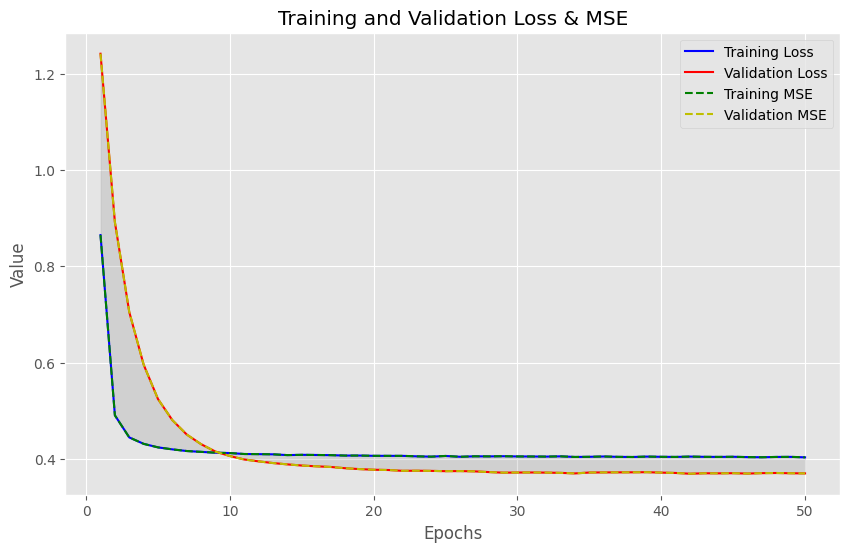

In [10]:
tf_lr = Linear_Regression_Tensorflow.TfLinearRegression(
    input_shape = input_shape,
    output_shape = output_shape,
    batch_size = 32,
    epochs = 50,
    lr = 0.001
)

tf_lr.fit(
    X = X,
    y = y
)

In [12]:
sklearn_lr = Linear_Regression_Sklearn.LinearRegression()
sklearn_lr.fit(X, y)

LinearRegression()